In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cdf = pd.read_csv("https://raw.githubusercontent.com/Aravindan79/Customer-Conversion-Prediction/main/train.csv")
cdf.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
cdf.shape    

(45211, 11)

In [ ]:
#check dupliactes
cdf.duplicated().value_counts()

False    45205
True         6
dtype: int64

In [ ]:
cdf.drop_duplicates(inplace= True)

In [ ]:
cdf.duplicated().value_counts()


False    45205
dtype: int64

In [ ]:
cdf.shape

(45205, 11)

In [ ]:
cdf.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Outliner Correction


In [ ]:
Q1=cdf['age'].quantile(0.25)
Q2=cdf['age'].quantile(0.75)
print(Q1, Q2)
IQR=Q2-Q1
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q2 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

33.0 48.0
15.0
10.5 70.5


In [ ]:
import numpy as np
cdf.age = np.where(cdf.age>Upper_Whisker, Upper_Whisker,
    np.where(cdf.age<Lower_Whisker,Lower_Whisker,
        cdf.age))


In [ ]:
cdf.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.869052,15.80688,258.183055,2.763898
std,10.395247,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,70.500000,31.00000,4918.000000,63.000000


In [ ]:
#duration
Q1=cdf['dur'].quantile(0.25)
Q2=cdf['dur'].quantile(0.75)
IQR=Q2-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q2 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-221.0 643.0


In [ ]:
import numpy as np
cdf.dur = np.where(cdf.dur>Upper_Whisker, Upper_Whisker,
    np.where(cdf.dur<Lower_Whisker,Lower_Whisker,
        cdf.dur))

In [ ]:
Q1=cdf['num_calls'].quantile(0.25)
Q2=cdf['num_calls'].quantile(0.75)
IQR=Q2-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q2 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-2.0 6.0


In [ ]:
import numpy as np
cdf.num_calls = np.where(cdf.num_calls>Upper_Whisker, Upper_Whisker,
    np.where(cdf.num_calls<Lower_Whisker,Lower_Whisker,
        cdf.num_calls))

In [ ]:
cdf.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


DATA C


In [ ]:
cdf.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
import numpy as np
cdf.job = cdf.job.replace("unknown", np.nan)

In [ ]:
cdf.job = cdf.job.fillna("blue-collar")

In [ ]:
cdf.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
cdf.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
cdf.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
#replacing unknown by the highest values
cdf.education_qual = cdf.education_qual.replace("unknown", "secondary")

In [ ]:
cdf.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
cdf.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
cdf.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
cdf.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
cdf.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

[]

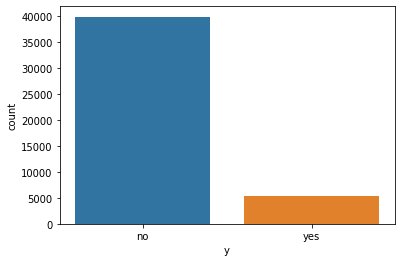

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = cdf.y, data =cdf)
plt.plot()

In [ ]:
# adding a target column 
cdf["target"] = cdf["y"].map({"yes":1, "no":0})

In [ ]:
cdf

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47.0,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33.0,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes,1
45207,70.5,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes,1
45208,70.5,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes,1
45209,57.0,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no,0


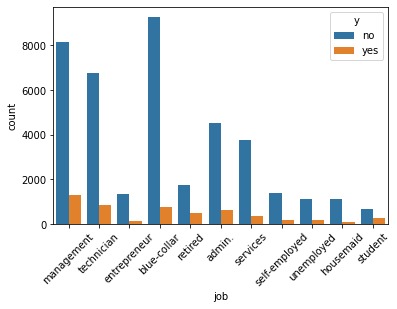

In [ ]:
import seaborn as sns
pt = sns.countplot(x = cdf.job,hue = "y", data = cdf)
pt.tick_params(axis ="x", rotation = 45)

EN


In [ ]:
cdf.groupby("job")["target"].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

<Axes: ylabel='job'>

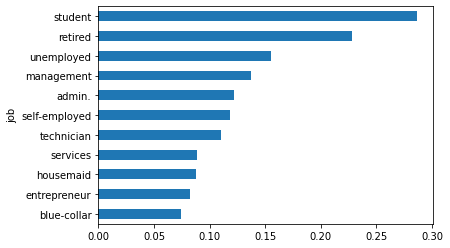

In [ ]:
cdf.groupby("job")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.job = cdf.job.replace({"student":10, 
                         "retired":9,
                         "unemployed":8,
                         "management":7,
                         "admin.":6,
                         "self-employed":5,
                         "technician":4, 
                         "services":3, 
                         "housemaid":2,
                         "entrepreneur":1, 
                         "blue-collar":0})

In [ ]:
cdf.groupby("marital")["target"].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

<Axes: ylabel='marital'>

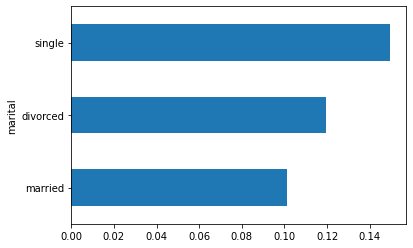

In [ ]:
cdf.groupby("marital")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.marital = cdf.marital.replace({"single":2, "divorced":1, "married": 0})

In [ ]:
cdf.groupby("education_qual")["target"].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: target, dtype: float64

<Axes: ylabel='education_qual'>

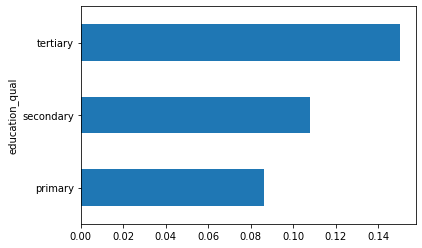

In [ ]:
cdf.groupby("education_qual")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.education_qual = cdf.education_qual.replace({"tertiary":2, "secondary":1, "primary":0})

In [ ]:
cdf.groupby("call_type")["target"].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

<Axes: ylabel='call_type'>

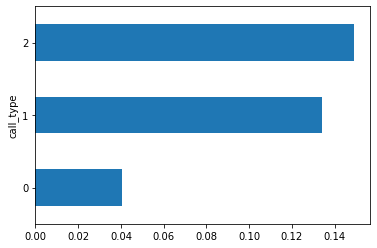

In [ ]:
cdf.groupby("call_type")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.call_type = cdf.call_type.replace({"cellular":2, "telephone":1, "unknown":0})

<Axes: ylabel='day'>

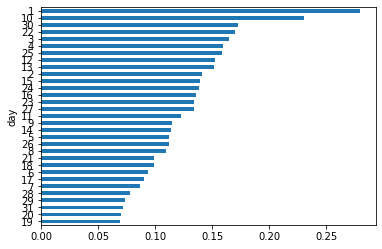

In [ ]:
cdf.groupby("day")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.day = cdf.day.replace({1:30,
                         10:29,
                         30:28,
                         22:27, 3:26, 4:25, 25:24, 12:23, 13:22, 2:21, 15:20, 24:19, 
                         16:18, 23:17, 27:16, 11:15, 9:14, 14:13, 5:12, 26:11, 
                         8:10, 21:9, 18:8, 6:7, 17:6,7:5,28:4,29:3,31:2,
                         20:1,19:0})

In [ ]:
cdf.groupby("mon")["target"].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

<Axes: ylabel='mon'>

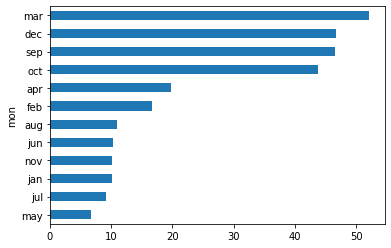

In [ ]:
(cdf.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
cdf.mon = cdf.mon.replace({"mar":11, 
                         "dec":10,
                         "sep":9,
                         "oct":8, "apr":7,
                         "feb":6, "aug":5, 
                         "jun":4, "nov":3,
                         "jan":2, "jul":1, 
                         "may":0})

In [ ]:
cdf.groupby("num_calls")["target"].mean()

num_calls
1.0    0.145992
2.0    0.112053
3.0    0.111936
4.0    0.090057
5.0    0.078798
6.0    0.058094
Name: target, dtype: float64

<Axes: ylabel='num_calls'>

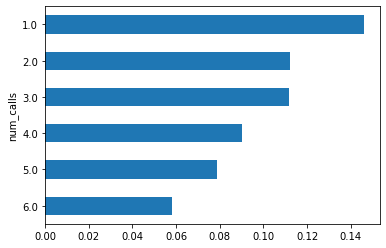

In [ ]:
cdf.groupby("num_calls")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.num_calls = cdf.num_calls.replace({1:5,
                         2:4,
                         3:3,
                         4:2, 5:1, 6:0})

In [ ]:
cdf.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

<Axes: ylabel='prev_outcome'>

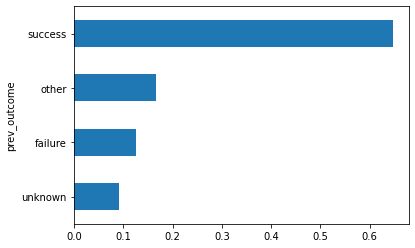

In [ ]:
cdf.groupby("prev_outcome")["target"].mean().sort_values().plot(kind="barh")

In [ ]:
cdf.prev_outcome = cdf.prev_outcome.replace({"success":3, "other":2, "failure": 1, "unknown":0})

<Axes: xlabel='target', ylabel='age'>

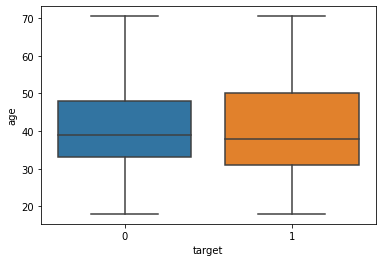

In [ ]:
sns.boxplot(x = cdf.target, y = cdf.age)

In [ ]:
cdf = cdf.drop(['y'], axis =1)

In [ ]:
cdf

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,7,0,2,0,12,0,261.0,5.0,0,0
1,44.0,4,2,1,0,12,0,151.0,5.0,0,0
2,33.0,1,0,1,0,12,0,76.0,5.0,0,0
3,47.0,0,0,1,0,12,0,92.0,5.0,0,0
4,33.0,0,2,1,0,12,0,198.0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,2,2,6,3,643.0,3.0,0,1
45207,70.5,9,1,0,2,6,3,456.0,4.0,0,1
45208,70.5,9,0,1,2,6,3,643.0,1.0,3,1
45209,57.0,0,0,1,1,6,3,508.0,2.0,0,0


DATA SPL

In [ ]:
x = cdf.drop(['target'], axis=1)
y = cdf['target']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
4634,31.0,6,2,1,0,1,0,643.0,5.0,0
23984,58.0,9,0,0,2,3,5,76.0,0.0,0
27517,31.0,1,2,1,1,9,3,544.0,4.0,0
7439,45.0,6,0,1,0,3,0,18.0,0.0,0
6879,26.0,0,0,1,0,4,0,346.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
11286,36.0,3,0,1,0,8,4,111.0,4.0,0
44738,70.5,9,0,1,1,10,9,606.0,3.0,3
38164,34.0,0,0,1,2,20,0,160.0,5.0,1
860,33.0,9,0,1,0,5,0,111.0,5.0,0


BALANCING TRAIN DATA

---





In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(random_state=42)
x_smt, y_smt = smt.fit_resample(x_train, y_train)

In [ ]:
print(x_train.shape, y_train.shape)

(33903, 10) (33903,)


In [ ]:
print(x_smt.shape, y_smt.shape)

(51138, 10) (51138,)


In [ ]:
x_smt

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.000000,9,0,0,2,3,5,76.000000,0.000000,0
1,45.000000,6,0,1,0,3,0,18.000000,0.000000,0
2,26.000000,0,0,1,0,4,0,346.000000,4.000000,0
3,31.000000,6,2,1,2,5,1,401.000000,4.000000,0
4,32.000000,6,0,2,2,8,3,278.000000,4.000000,0
...,...,...,...,...,...,...,...,...,...,...
51133,33.384858,2,0,1,0,19,0,588.769716,3.769716,0
51134,38.789015,5,1,1,2,20,1,407.315024,2.789015,1
51135,47.000000,2,0,1,2,10,5,643.000000,4.000000,0
51136,58.721850,8,0,1,2,12,0,643.000000,4.278150,0


SCALING

---



In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_smt)
X_train = scaler.transform(x_smt)
X_test = scaler.transform(x_test)

In [ ]:
X_train

array([[ 1.49836132,  1.59137145, -0.76386139, ..., -1.13765774,
        -2.60253865, -0.49801492],
       [ 0.34913235,  0.54143463, -0.76386139, ..., -1.41347693,
        -2.60253865, -0.49801492],
       [-1.33051   , -1.55843902, -0.76386139, ...,  0.14632812,
         0.16214745, -0.49801492],
       ...,
       [ 0.52593681, -0.85848114, -0.76386139, ...,  1.55871257,
         0.16214745, -0.49801492],
       [ 1.56217451,  1.24139251, -0.76386139, ...,  1.55871257,
         0.3543965 , -0.49801492],
       [-1.4712111 ,  1.24139251,  1.58060602, ...,  1.55871257,
         0.85331897, -0.49801492]])

LOGIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_smt)

LogisticRegression()

In [ ]:
LR_y_pred_test = LR.predict_proba(X_test)[:, 1]
LR_y_pred_train = LR.predict_proba(X_train)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

# print(f'Train score {accuracy_score(LR_y_pred_train,y_smt)}')
# print(f'Test score {accuracy_score(LR_y_pred_test,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,LR_y_pred_test)}')

auroc score 0.8908741282251424


In [ ]:
from sklearn.metrics import roc_auc_score
LR_auroc = roc_auc_score(y_test, LR_y_pred_test)
LR_auroc

0.8908741282251424

DECESION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion="gini", max_depth = 10)
dtc.fit(X_train, y_smt)
dtc_y_pred_test = dtc.predict(X_test)
dtc_y_pred_train = dtc.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(f'auroc score {metrics.roc_auc_score(y_test,dtc_y_pred_test)}')

auroc score 0.8126199499762264


In [ ]:
dtc_auroc = roc_auc_score(y_test, dtc_y_pred_test)
dtc_auroc

0.8126199499762264

# Random forest classifier

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=45)
rfc.fit(X_train, y_smt)
#y_pred = dtc.predict(X_test)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn import metrics
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')


auroc score 0.84142057502228


In [ ]:
rfc_auroc = roc_auc_score(y_test, y_test_pred)
rfc_auroc

0.84142057502228

KNN

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier 
 from sklearn.model_selection import cross_val_score
 for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_smt)
    print("K value  : " , i, " train score : ", knn.score(X_train, y_smt) ,  " Cross-Val score : ", np.mean(cross_val_score(knn, X_train,y_smt, cv=10, scoring = "roc_auc")))

K value  :  1  train score :  1.0  Cross-Val score :  0.9310245333152347
K value  :  2  train score :  0.9819703547264266  Cross-Val score :  0.9509018789646936
K value  :  3  train score :  0.9621612108412531  Cross-Val score :  0.9589070907936652
K value  :  4  train score :  0.9590519770034026  Cross-Val score :  0.963174483587605
K value  :  5  train score :  0.9480621064570378  Cross-Val score :  0.9651145825213467
K value  :  6  train score :  0.9468888106691697  Cross-Val score :  0.9661791264923734
K value  :  7  train score :  0.9402987993273104  Cross-Val score :  0.9670493049997241
K value  :  8  train score :  0.9393992725566115  Cross-Val score :  0.9675494163483469
K value  :  9  train score :  0.9356838358950291  Cross-Val score :  0.967779366355978
K value  :  10  train score :  0.9342954358793852  Cross-Val score :  0.9681505550751789
K value  :  20  train score :  0.9206460948805194  Cross-Val score :  0.9679853116134733
K value  :  50  train score :  0.90953889475536

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=10, metric='minkowski')  
knn.fit(X_train, y_smt)  
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score

print(f'Train score {accuracy_score(y_train_pred,y_smt)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
print(f'auroc score {metrics.roc_auc_score(y_test,y_test_pred)}')

Train score 0.9342954358793852
Test score 0.7811006901433375
auroc score 0.8208919679438269


In [ ]:
knn_auroc = roc_auc_score(y_test, y_test_pred)
knn_auroc

0.8208919679438269

XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,y_smt)
  model.score(X_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9163244553952051  Cross-Val score :  0.9145841602008147
Learning rate :  0.02  Train score :  0.9295631428683171  Cross-Val score :  0.9259259660113198
Learning rate :  0.03  Train score :  0.9400836950995346  Cross-Val score :  0.9359185841514812
Learning rate :  0.04  Train score :  0.9473581289843169  Cross-Val score :  0.9421371757758429
Learning rate :  0.05  Train score :  0.9521099769251828  Cross-Val score :  0.9462241415958662
Learning rate :  0.06  Train score :  0.9554734248504048  Cross-Val score :  0.9484534158445413
Learning rate :  0.07  Train score :  0.9577026868473543  Cross-Val score :  0.9505262720705255
Learning rate :  0.08  Train score :  0.9603426023700575  Cross-Val score :  0.9519929147607442
Learning rate :  0.09  Train score :  0.9615354530877234  Cross-Val score :  0.9531467214055807
Learning rate :  0.1  Train score :  0.9644295826977981  Cross-Val score :  0.9540071046672155
Learning rate :  0.11  Train score :  0.9

In [ ]:
import xgboost as xgb
classifier = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.5, n_estimators=100, verbosity = 0)
classifier.fit(X_train, y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import roc_auc_score
Y_pred = classifier.predict_proba(X_test)[:, 1]
XGB_auroc = roc_auc_score(y_test, Y_pred)
print("AUROC score: %.2f%%" % (XGB_auroc * 100.0))

AUROC score: 91.24%


In [ ]:
XGB_auroc = roc_auc_score(y_test, Y_pred)

Logistic Regrssion         0.8908741282251424

KNN Classifier             0.8126199499762264

Decision Tree Classifier   0.8126199499762264

Random Forest Classifier   0.84142057502228

XG Boost Classifier        0.91240

In [ ]:
pd.DataFrame({"Model":["Logistic Regression", "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "XGBoost Classifier"], "AUROC":[LR_auroc, knn_auroc,dtc_auroc,rfc_auroc,XGB_auroc]})


,Model,AUROC
0,Logistic Regression,0.890874
1,KNN Classifier,0.820892
2,Decision Tree Classifier,0.812620
3,Random Forest Classifier,0.841421
4,XGBoost Classifier,0.912404
